In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as po
import geopandas as gpd
import json 
import os

In [4]:
path = r"C:\Users\Harmanbeer Singh\Downloads\data.csv"

In [5]:
df = pd.read_csv(path)

In [6]:
df.head()

Date Time (utc)                                Region  Magnitude  \
0  23-06-2024   04:51:49                  Mindanao, Philippine        4.8   
1  23-06-2024   03:58:03               Near Coast of Venezuela        5.9   
2  23-06-2024   03:12:08      Near East Coast of Honshu, japan        5.0   
3  22-06-2024   20:46:51                    Near Coast of Peru        5.3   
4  22-06-2024   18:08:44  Afghanistan-Tajikistan Border Region        3.8   

   Depth (km) Latitude Longitude Mode  
0         342   8.01 N  125.20 E    A  
1         105  10.80 N   62.65 W    A  
2          55  37.16 N  141.09 E    A  
3          64  15.79 S   74.47 W    A  
4         179  36.36 N   71.45 E    M

In [7]:
df.tail()

Date Time (utc)                         Region  Magnitude  \
14721  27-11-2015   16:40:28         Near Sirinagar Kashmir        4.8   
14722  26-11-2015   16:18:00                  Dadu Pakistan        3.0   
14723  22-11-2015   18:16:04  Afghanistan-Tajikistan Border        6.2   
14724  19-11-2015   23:38:47          50 km East of Bhakkar        3.8   
14725  12-04-2015   03:36:12                 Near Abbatabad        2.3   

       Depth (km) Latitude Longitude Mode  
14721          10   34.22N    74.95E    M  
14722          30   26.72N    67.85E    M  
14723          86   36.43N    71.61E    M  
14724          10   31.60N    71.62E    M  
14725          10   34.04N    73.18E    A

In [13]:
df['Mode'] = df['Mode'].replace({'M' : 'Manual Detection'})

In [15]:
df['Mode'] = df['Mode'].replace({'A' : 'Automatic Detection'})

In [16]:
df.tail()

Date Time (utc)                         Region  Magnitude  \
14721  27-11-2015   16:40:28         Near Sirinagar Kashmir        4.8   
14722  26-11-2015   16:18:00                  Dadu Pakistan        3.0   
14723  22-11-2015   18:16:04  Afghanistan-Tajikistan Border        6.2   
14724  19-11-2015   23:38:47          50 km East of Bhakkar        3.8   
14725  12-04-2015   03:36:12                 Near Abbatabad        2.3   

       Depth (km) Latitude Longitude                 Mode  
14721          10   34.22N    74.95E     Manual Detection  
14722          30   26.72N    67.85E     Manual Detection  
14723          86   36.43N    71.61E     Manual Detection  
14724          10   31.60N    71.62E     Manual Detection  
14725          10   34.04N    73.18E  Automatic Detection

In [18]:
df.shape

(14726, 8)

In [19]:
df.nunique()

Date           2672
Time (utc)    13391
Region         3221
Magnitude        77
Depth (km)      601
Latitude       6517
Longitude      7664
Mode              2
dtype: int64

In [20]:
missing_values = ["N/A" , "na" , np.nan]
data = pd.read_csv(path, na_values = missing_values)

In [22]:
df.isnull().any()

Date          False
Time (utc)    False
Region        False
Magnitude     False
Depth (km)    False
Latitude      False
Longitude     False
Mode          False
dtype: bool

In [32]:
df.describe()

Magnitude    Depth (km)
count  14726.000000  14726.000000
mean       4.465259     94.491783
std        1.048695    116.171875
min        0.700000      0.000000
25%        3.700000     11.000000
50%        4.600000     60.000000
75%        5.200000    134.000000
max       37.000000   3654.000000

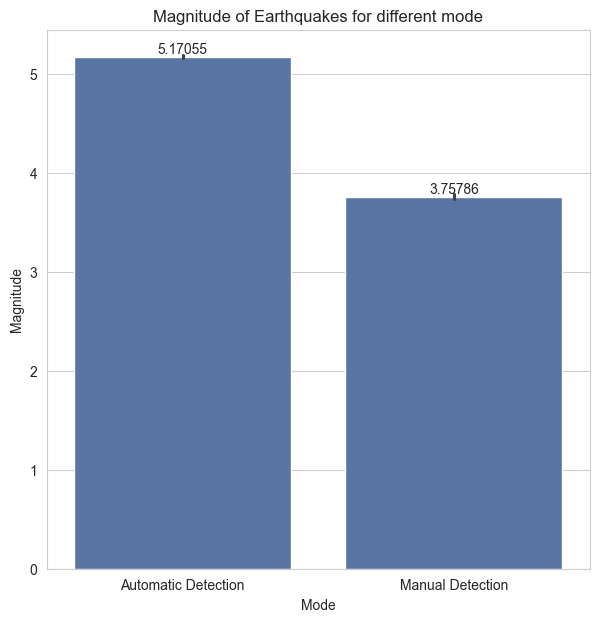

In [92]:
ax = sns.barplot(x = "Mode", y = "Magnitude", data = df, legend = True)
sns.set({"figure.figsize": (7, 7)}, style = "whitegrid")
ax.set_title('Magnitude of Earthquakes for different mode')
for bars in ax.containers:
        ax.bar_label(bars)

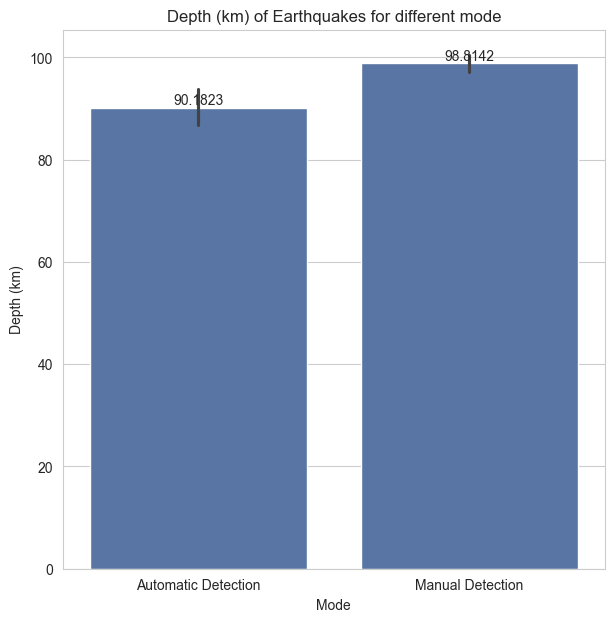

In [93]:
ax = sns.barplot(x = "Mode", y = "Depth (km)", data = df, legend = True)
sns.set({"figure.figsize": (7, 7)}, style = "whitegrid")
ax.set_title('Depth (km) of Earthquakes for different mode')
for bars in ax.containers:
        ax.bar_label(bars)

In [42]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst = True)

In [43]:
df['Year'] = df['Date'].dt.strftime('%Y')

In [44]:
df.head()

Date Time (utc)                                Region  Magnitude  \
0 2024-06-23   04:51:49                  Mindanao, Philippine        4.8   
1 2024-06-23   03:58:03               Near Coast of Venezuela        5.9   
2 2024-06-23   03:12:08      Near East Coast of Honshu, japan        5.0   
3 2024-06-22   20:46:51                    Near Coast of Peru        5.3   
4 2024-06-22   18:08:44  Afghanistan-Tajikistan Border Region        3.8   

   Depth (km) Latitude Longitude                 Mode  Year  
0         342   8.01 N  125.20 E  Automatic Detection  2024  
1         105  10.80 N   62.65 W  Automatic Detection  2024  
2          55  37.16 N  141.09 E  Automatic Detection  2024  
3          64  15.79 S   74.47 W  Automatic Detection  2024  
4         179  36.36 N   71.45 E     Manual Detection  2024

In [45]:
df.nunique()

Date           2672
Time (utc)    13391
Region         3221
Magnitude        77
Depth (km)      601
Latitude       6517
Longitude      7664
Mode              2
Year             10
dtype: int64

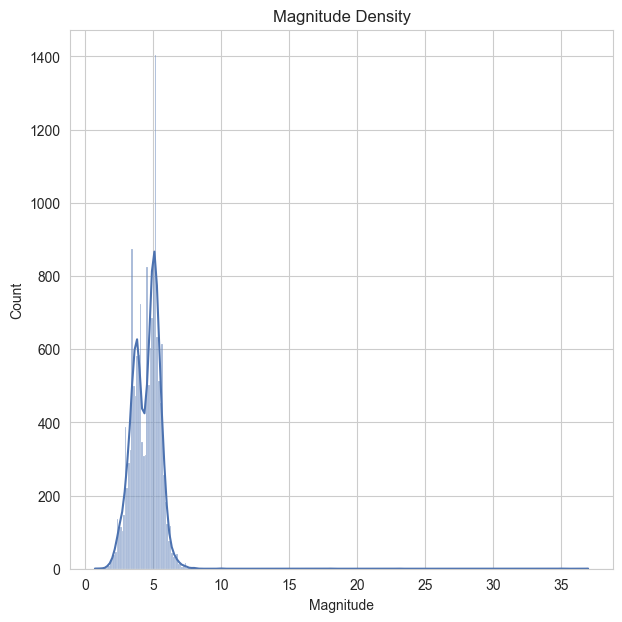

In [94]:
sns.histplot(x = "Magnitude", data = df, kde = True).set_title("Magnitude Density")
sns.set({"figure.figsize": (7, 20)}, style = "whitegrid")

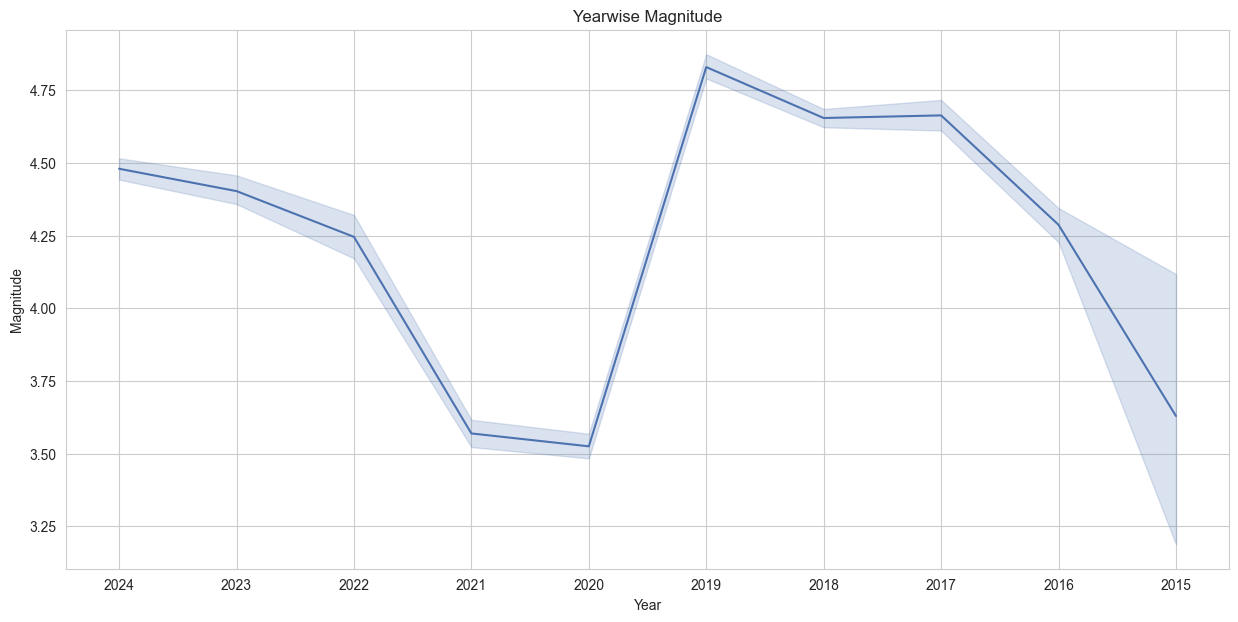

In [96]:
sns.lineplot(x = "Year", y = "Magnitude", data = df, legend = True).set_title('Yearwise Magnitude')
sns.set({"figure.figsize": (15, 7)}, style = "whitegrid")

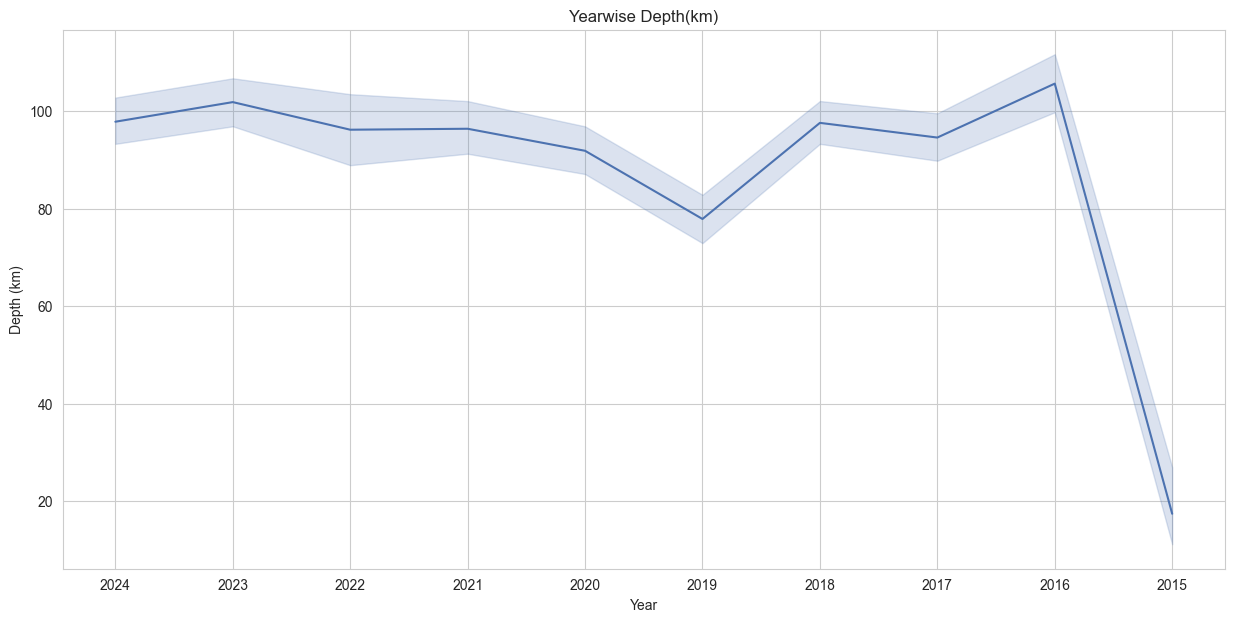

In [97]:
sns.lineplot(x = "Year", y = "Depth (km)", data = df, legend = True).set_title('Yearwise Depth(km)')
sns.set({"figure.figsize": (15, 7)}, style = "whitegrid")

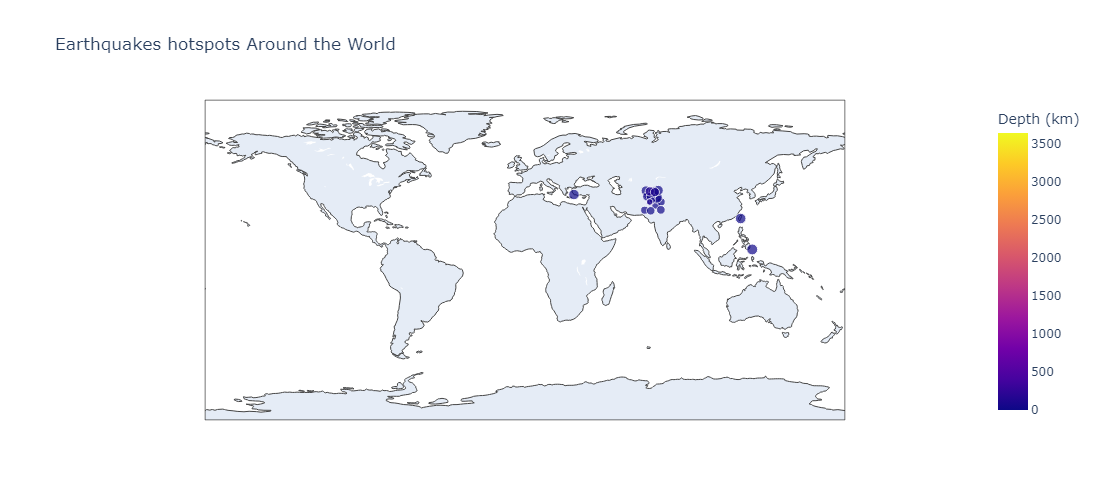

In [116]:
fig = po.scatter_geo(df, lat='Latitude', lon='Longitude', color='Depth (km)', size = 'Magnitude',
                     hover_name='Region', title='Earthquakes hotspots Around the World')
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
)
fig.show()

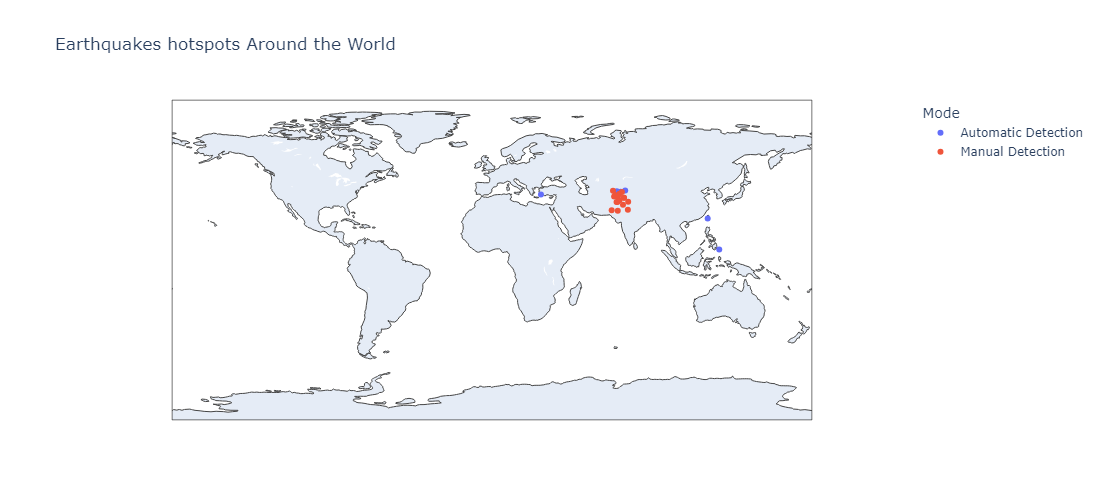

In [118]:
fig = po.scatter_geo(df, lat='Latitude', lon='Longitude', color='Mode',
                     hover_name='Region', title='Earthquakes hotspots Around the World')
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
)
fig.show()